#*Universidad de Buenos Aires*

# *CEIA - Algoritmos Evolutivos*


Algoritmo Genético que encuentra el máximo de la función x^2
en el intervalo [0, 31]

Selección por ruleta

Pc = 0.92

Pm = 0.1


In [21]:

import random

# Parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 5
TASA_MUTACION = 0.1
TASA_CRUCE = 0.92
GENERACIONES = 10


#  -----------------------------------------------------------------
# Aptitud (y = x^2)
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = int(cromosoma, 2)
    return x ** 2


#  -----------------------------------------------------------------
# Inicializar la población
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for tp in range(tamanio_poblacion):
        cromosoma = ""
        for lc in range(longitud_cromosoma):
            #  se crean los cromosomas alelo por alelo en forma aleatoria
            #  hasta completar toda la poblacion
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion


#  -----------------------------------------------------------------
# Seleccion por ruleta
#  -----------------------------------------------------------------
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma = suma + prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    # despues de generar un numero aleatorio entre 0 y 1
    # se itera sobre la lista probabilidades_acumuladas
    # y se obtiene el indice (i) del cromosoma que selecciono para que forme parte de la nueva poblacion
    # tambien se obtiene el valor de probabilidad acumulada en la variable "acumulada"
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]


#  -----------------------------------------------------------------
# Cruce monopunto con probabilidad de cruza pc = 0.92
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)  # elijo aleatoriamente un punto de cruce
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


#  -----------------------------------------------------------------
# mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:  # aqui se itera cada gen del cromosoma recibido
        if random.random() < tasa_mutacion:
            # se produce la mutacion de un alelo si es que el numero aleatorio generado
            # es inferior que tasa_mutacion tambien llamado "pm" (prob.de mutacion)
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


#  -----------------------------------------------------------------
# aplicacion de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):  # en este caso se definio un maximo de 10 generaciones
        print("Generación:", generacion + 1)

        # se calcula aptitud total (suma de evaluaciones de cada cromosoma) para luego
        # poder obtener la Ps de cada individuo (Ps = f(i) / sumatoria(f(i)) <-ruleta)
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total + aptitud(cromosoma)

        print("Sumatoria de aptitudes total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        # se crea una lista vacia de progenitores primero y luego se llama
        # a la funcion seleccion_ruleta para que devuelva de a uno los individuos
        # que se convertiran en futuros progenitores
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            #  se llama a cruce_mono_punto y se le envia pares de progenitores secuencialmente
            # para que se produzca la cruza (en este caso monopunto) segun la tasa_cruce (o Pc)
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aqui se aplica elitismo
        # se reemplazar los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", int(mejor_individuo, 2), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)


#  -----------------------------------------------------------------
# algoritmo genetico ejecucion principal
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", int(mejor_solucion, 2), "Aptitud:", aptitud(mejor_solucion))


_________________________________________________________________________________

Generación: 1
Sumatoria de aptitudes total: 946
Mejor individuo: 23 Aptitud: 529
_________________________________________________________________________________
Generación: 2
Sumatoria de aptitudes total: 1651
Mejor individuo: 28 Aptitud: 784
_________________________________________________________________________________
Generación: 3
Sumatoria de aptitudes total: 2371
Mejor individuo: 29 Aptitud: 841
_________________________________________________________________________________
Generación: 4
Sumatoria de aptitudes total: 2683
Mejor individuo: 29 Aptitud: 841
_________________________________________________________________________________
Generación: 5
Sumatoria de aptitudes total: 2995
Mejor individuo: 29 Aptitud: 841
_________________________________________________________________________________
Generación: 6
Sumatoria de aptitudes total: 3307
Mejor individuo: 29 Aptitud: 841
________________



---


# Metaheurística: Algoritmo genético

---




*   Método: Ruleta
*   Función objetivo: x^2

*   Problema: Minimización
*   Intervalo de variable de desición: [-31, 31]

*   Elitismo: Si

*   Pc = 0.92 (probabilidad de cruza)
*   Pm = 0.1 (probabilidad de mutacion)

*   Iteraciones o generaciones = 20




---


# Algoritmo Genético que encuentra el mínimo de la función objetivo x^2 en el intervalo [-31, 31]
# El rango dado por [-31, 31] es 62 es decir: X_MIN - XMAX por tanto el rango debe ser contenido por un exponente de 2 tal que 2^exponente >= 62, en este caso exponente = 6, es decir 2^6=64, ( log2(62)=5.95 ) de este modo obtengo la longitud del cromosoma, luego solo resta mapear lso cromosomas binarios en el rango [-31, 31]
# Para mapear se usa la fórmula:
# x = X_MIN + decimal(valor_binario) * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)


---



# Si necesito trabajar con números reales para obtener mas precisión se procede igual pero se debe multiplicar el rango por 10 si quiero tener un dígito decimal, x100 para 2 dígitos decimales, etc. En este caso, el rango es 62, multiplicado por 10 (para que proporcione 1 dígito decimal) es 620.
# Para saber la dimensión del cromosoma debo despejar el exponente de 2^exponente = 620 , log2(620)=9.28
# es decir que el valor que contiene a 620 es exponente=10; 2^10=1024
# debo por tanto cambiar la constante LONGITUD_CROMOSOMA = 10, de ese modo ahora el intervalo será real con 1 dígito [-31.0, 31.0]


---



_________________________________________________________________________________

Generación: 1
Aptitud total: 0.0675488747946252
mi 0110110010
Mejor individuo: -4.6969696969696955 Aptitud: 0.0453257290439572
_________________________________________________________________________________
Generación: 2
Aptitud total: 0.13024194052638405
mi 0110110010
Mejor individuo: -4.6969696969696955 Aptitud: 0.0453257290439572
_________________________________________________________________________________
Generación: 3
Aptitud total: 0.16486632906393406
mi 0111110000
Mejor individuo: -0.9393939393939377 Aptitud: 1.1319119125153745
_________________________________________________________________________________
Generación: 4
Aptitud total: 1.2656373428529715
mi 0111110000
Mejor individuo: -0.9393939393939377 Aptitud: 1.1319119125153745
_________________________________________________________________________________
Generación: 5
Aptitud total: 2.3544752831186635
mi 0111110100
Mejor individuo: 

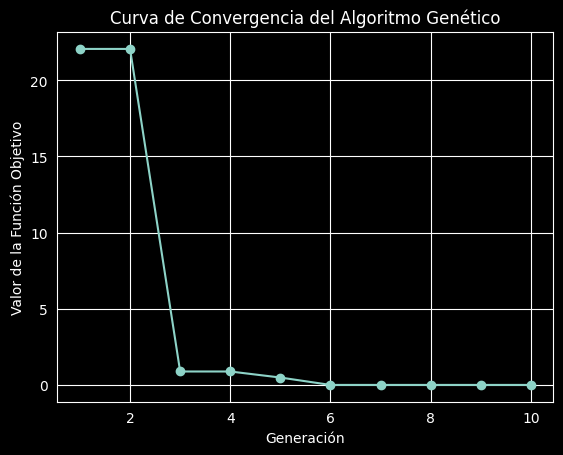

Mejor solución: -0.030303030303031164 Aptitud: 521.3020584011347


In [6]:

import random
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")
plt.style.use('dark_background')


# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.1
TASA_CRUCE = 0.92
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # Valor pequeño para evitar división por cero en la funcion fitness


#  -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
#  -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

#  -----------------------------------------------------------------
# Aqui en las proximas lineas se puede ver que mi funcion objetivo es
# a veces diferente de mi funcion fitness, depende del problema a resolver
#  -----------------------------------------------------------------


#  -----------------------------------------------------------------
# funcion objetivo x^2
#  -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2


#  -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)


#  -----------------------------------------------------------------
# se inicializa la poblacion
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for tp in range(tamanio_poblacion):
        cromosoma = ''
        for lc in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

#  -----------------------------------------------------------------
# seleccion por ruleta
#  -----------------------------------------------------------------
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma += prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]


#  -----------------------------------------------------------------
# cruce monopunto con probabilidad de cruza pc = 0.92
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


#  -----------------------------------------------------------------
# mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


#  -----------------------------------------------------------------
# aplicación de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # se calcula aptitud total para luego
        aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)

        print("Aptitud total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aquí se aplica elitismo
        # Se reemplazan los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)  # se ordena la poblacion por aptitud en forma ascendente
        # se ordena los descendientes por aptitud en forma descendente
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)  # Buscar el maximo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))

        print("mi", mejor_individuo)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title('Curva de Convergencia del Algoritmo Genético')
    plt.grid(True)
    plt.show()
    return max(poblacion, key=aptitud)  # se retorna el mejor individuo


#  -----------------------------------------------------------------
# ejecucion principal del algoritmo genetico
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))


In [18]:
#  -----------------------------------------------------------------
# Metaheuristica: Algoritmo genetico
# Metodo: Ranking Lineal
# Funcion objetivo: x^2
# Problema: Minimizacion
# Intervalo de variable de decision: [-31, 31]
# Pc = 0.85 (probabilidad de cruza)
# Pm = 0.07 (probabilidad de mutacion)
# Iteraciones o generaciones = 10
#  -----------------------------------------------------------------
import random

# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.2
TASA_CRUCE = 0.7
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # Valor pequeño para evitar división por cero en la funcion fitness


# -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
# -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x


# -----------------------------------------------------------------
# funcion objetivo x^2
# -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2


# -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
# -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)


# -----------------------------------------------------------------
# se inicializa la poblacion
# -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion


# -----------------------------------------------------------------
# seleccion por ranking lineal
# -----------------------------------------------------------------
def seleccion_ranking(poblacion):
    # se calcula la aptitud de cada individuo
    aptitudes = []
    for individuo in poblacion:
        aptitudes.append(aptitud(individuo))

    # se ordena la poblacion por aptitud (mayor aptitud es mejor)
    # x es la tupla de zip, de la cual se toma el segundo elemento (x[1]) para
    # ser ordenada la tupla por ese elemento, en este caso por aptitud
    poblacion_ordenada = sorted(zip(poblacion, aptitudes), key=lambda x: x[1])

    # se calcula probabilidades segun el ranking lineal
    N = len(poblacion)
    s = 1.7  # Factor de seleccion comunmente usado
    probabilidades = []
    for i in range(N):
        prob = (2 - s) / N + (2 * i * (s - 1)) / (N * (N - 1))
        probabilidades.append(prob)

    # se selecciona un progenitor basado en las probabilidades
    r = random.random()
    suma = 0
    for i in range(N):
        suma = suma + probabilidades[i]
        if r <= suma:
            return poblacion_ordenada[i][0]  # se retornar el cromosomas


# -----------------------------------------------------------------
# Cruce monopunto con probabilidad de cruza pc = 0.92
# -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


# -----------------------------------------------------------------
# Mutacion
# -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado+str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


# -----------------------------------------------------------------
# aplicacion de operadores geneticos
# -----------------------------------------------------------------
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # seleccion de progenitores con el metodo de ranking lineal
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ranking(poblacion))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        #  -----------------------------------------------------------------
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la población con los descendientes mutados
        poblacion = descendientes_mutados

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)  # se retorna el mejor individuo


# ejecucion principal del algoritmo genetico
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))


_________________________________________________________________________________

Generación: 1
Mejor individuo: 2.0909090909090935 Aptitud: 0.22868115232621591
_________________________________________________________________________________
Generación: 2
Mejor individuo: 0.15151515151515227 Aptitud: 41.7417302311315
_________________________________________________________________________________
Generación: 3
Mejor individuo: -3.3030303030303045 Aptitud: 0.09165055067337058
_________________________________________________________________________________
Generación: 4
Mejor individuo: -2.333333333333332 Aptitud: 0.18363973963965818
_________________________________________________________________________________
Generación: 5
Mejor individuo: -7.90909090909091 Aptitud: 0.01598600418727617
_________________________________________________________________________________
Generación: 6
Mejor individuo: -10.696969696969695 Aptitud: 0.008739260269688118
_________________________________

In [20]:
#  -----------------------------------------------------------------
# Metaheuristica: Algoritmo genetico
# Metodo: Torneo
# Funcion objetivo: x^2
# Problema: Minimizacion
# Intervalo de variable de decision: [-31, 31]
# Pc = 0.85 (probabilidad de cruza)
# Pm = 0.09 (probabilidad de mutacion)
# Iteraciones o generaciones = 10
#  -----------------------------------------------------------------
import random

# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.85
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # valor pequeño para evitar division por cero en la funcion fitness
TAMANIO_TORNEO = 3  # tamaño del torneo

#  -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
#  -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

#  -----------------------------------------------------------------
# funcion objetivo x^2
#  -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2

#  -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)

#  -----------------------------------------------------------------
# se inicializa la poblacion
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

#  -----------------------------------------------------------------
# seleccion por torneo
#  -----------------------------------------------------------------
def seleccion_torneo(poblacion, tamanio_torneo=TAMANIO_TORNEO):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud)  # se selecciona el mejor individuo del torneo
        progenitores.append(progenitor)
    return progenitores

#  -----------------------------------------------------------------
# cruce monopunto con probabilidad de cruza pc = 0.85
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

#  -----------------------------------------------------------------
# Mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado

#  -----------------------------------------------------------------
# aplicacion de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        #  -----------------------------------------------------------------
        # Seleccion de progenitores con el metodo torneo
        progenitores = seleccion_torneo(poblacion)

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la poblacion con los descendientes mutados
        poblacion = descendientes_mutados

        # se muestra el mejor individuo de la generacion
        mejor_individuo = min(poblacion, key=aptitud)  # Buscar el mínimo para la aptitud
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)  # Retornar el mejor individuo

#  -----------------------------------------------------------------
# Ejecucion principal del algoritmo genetico
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))


_________________________________________________________________________________

Generación: 1
Mejor individuo: 29.78787878787879 Aptitud: 0.0011269907581552354
_________________________________________________________________________________
Generación: 2
Mejor individuo: -5.666666666666668 Aptitud: 0.031140898726337234
_________________________________________________________________________________
Generación: 3
Mejor individuo: -5.181818181818183 Aptitud: 0.037240841446040306
_________________________________________________________________________________
Generación: 4
Mejor individuo: -5.181818181818183 Aptitud: 0.037240841446040306
_________________________________________________________________________________
Generación: 5
Mejor individuo: -10.272727272727273 Aptitud: 0.009475985073678915
_________________________________________________________________________________
Generación: 6
Mejor individuo: 27.545454545454547 Aptitud: 0.001317951840536628
__________________________